### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fh_original = pd.read_csv("foodhub_order.csv")
#print(f"{fh_original.head(5)})")
fh_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Get the total number of rows in the dataframe

# print(f"Total rows in the dataframe: {fh_original.shape[0]}")
# print('-----------------------------------------------------------------------------')
# print(f"Total columns in the dataframe: {fh_original.shape[1]}")
# print('-----------------------------------------------------------------------------')
# # Get the datatype of the 'order_id' column
# print(f"Datatype of 'order_id': {fh_original['order_id'].dtype}")
# print('-----------------------------------------------------------------------------')
count_null = 0 
count_na = 0
column_null_value_dict = {}  # Initialize the dictionary to store missing values count
column_na_value_dict = {}  # Initialize the dictionary to store missing values count

# Loop through each column in the dataframe and check for null and NA values
for column in fh_original.columns:
    #print(f"Column name: {column} and datatype:  {fh_original[column].dtype}") 
    if fh_original[column].isnull().sum() == 0:
        count_null += 1
        missing_values_count = fh_original[column].isnull().sum()
        column_null_value_dict[column] = int(missing_values_count)
    missing_values_count = 0
    if fh_original[column].isna().sum() == 0:
        count_na += 1
        missing_values_count = fh_original[column].isna().sum()
        column_na_value_dict[column] = int(missing_values_count)


#loop through the dictionary and print the values        
print('----------NUll and NaN values are considered missing values ------------------')
print('----------These are the NULL values in the data------------------------------')      
if column_null_value_dict.items() == 0:
    print('There are no null values in the data')
else:
    for column, missing_values_count in column_null_value_dict.items():
        print(f"{column} has these: {missing_values_count} null values")
print('----------These are the NaN values in the data------------------------------')      
if column_na_value_dict.items() == 0:
    print('There are no NaN values in the data')
else:
    for column, missing_values_count in column_na_value_dict.items():
        print(f"{column} has these: {missing_values_count} NaN values")
print('-----------------------------------------------------------------------------')  


#fh_original['order_id'].isnull().sum() # no null values in order_id

# # Display the first 5 rows of the dataframe
# fh_original.head(5)

# # Check for null values
# fh_original.isnull().sum() # no null

# # Check for NA values
# fh_original.isna().sum() # no na


Question 4
### meet the requiremewnts
stastictical time taken ( min ,max , average ) to prepare food

### additonal learning
# does cost of order have relation with food prep time?
# which cusine takes fastest ? 
# which expensice cusine takes fastest ?
#time taken ( min ,max , average ) to prepare food by cusine type
#time taken ( min ,max , average ) to prepare food by restaurant
#time taken ( min ,max , average ) to prepare food by weekday or weekend


In [68]:
# #time taken to prepare food 
fh_original.head(20)

#fh_original[fh_original.order_id == 0] # check the food preparation time for order_id 1

print(fh_original['food_preparation_time'].describe(include='food_preparation_time').mean())
print(fh_original['food_preparation_time'].describe(include='food_preparation_time').min())
#print(fh_original.describe(include='food_preparation_time').max())


print(f"Food preparation average time in seconds is  {round(fh_original['food_preparation_time'].describe().T.mean(),2)}")
print(f"Food preparation minimum time in seconds is  {round(fh_original.food_preparation_time.describe().T.min(),2)}")
print(f"Food preparation maximum time in seconds is  {round(fh_original.food_preparation_time.describe().max(),2)}")



# # count    1898.000000
# # mean       27.371970
# # std         4.632481
# # min        20.000000
# # 25%        23.000000
# # 50%        27.000000
# # 75%        31.000000
# # max        35.000000




258.2505564088984
4.63248077592887
Food preparation average time in seconds is  258.25
Food preparation minimum time in seconds is  4.63
Food preparation maximum time in seconds is  1898.0


### **Question 5:** How many orders are not rated? [1 mark]

In [69]:
#filter column rating for 'Not given' values and count the number of occurrences
#returns a series with the count of 'Not given' ratings

not_given = fh_original['rating'][fh_original['rating'] == 'Not given'].value_counts() # check the rating values
print(f"{not_given.values[0]} orders were not rated.")


# print (type(not_given)) # check the type of not_given
# print(not_given.index[0])
# print(not_given.values[0]) # check the value of not_given
# print(fh_original.index[10])
# print(fh_original.values[10])


#print(f"Not given rating count is {not_given}")

# fh_original[fh_original['rating']== 'Not given'].value_counts() # check the rating values

# fh_original[fh_original['rating']== 'Not given']
# print(fh_original[fh_original['rating'] == 'Not given'])


736 orders were not rated.


### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

------------------Distribution of Food Preparation Time---------------------
Boxplot was used to understand the Median and outliers
median is 27 minutes
NO outliers, no data points are outside the wiskers
Histogram was used to understand the following:
Most orders (about 250) took the fastest food preparation time of 20 minutes.
The slowest food preparation time of about 34 minutes had the third largest number of orders.


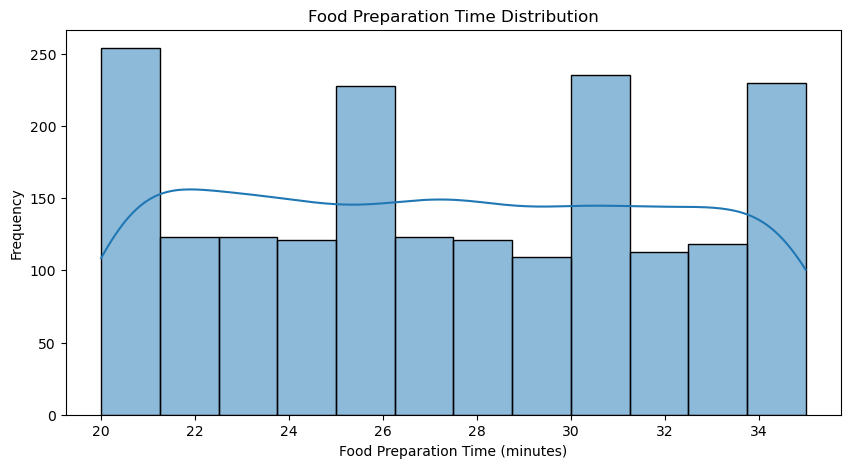

In [70]:
# distributions for numerial columns
#charts --> histograms,histogram with density cure, boxplots,bar graph, line   and scatterplots
# distribution is measured with mean, median, mode 

print('------------------Distribution of Food Preparation Time---------------------')
print('Boxplot was used to understand the Median and outliers')
print('median is 27 minutes')
print('NO outliers, no data points are outside the wiskers')
print('Histogram was used to understand the following:\n'
	  'Most orders (about 250) took the fastest food preparation time of 20 minutes.\n'
	  'The slowest food preparation time of about 34 minutes had the third largest number of orders.')


plt.figure(figsize=(10, 5))
sns.histplot(x = fh_original['food_preparation_time'] ,kde=True)
#sns.boxplot(x = fh_original['food_preparation_time'])
plt.title('Food Preparation Time Distribution')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency') 
plt.show()




# # get a list of numberical columns in the dataframe
# numerical_columns = fh_original.select_dtypes(include=[np.number]).columns.tolist()
# print(f"Numerical columns in the dataframe: {numerical_columns}")
# for column in numerical_columns:
#     #plt.figure(figsize=(10, 5))
#     sns.histplot(fh_original[column], bins=20, kde=True)
#     plt.title(f'{column} Distribution')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.show()
#     #plt.savefig(f"{column}_distribution.png")  # Save the plot as a PNG file   
#     #plt.close()  # Close the plot to free up memory
#     #plt.show()  # Show the plot





### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [79]:

top_restraunts = fh_original.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)
print('------------------Top 5 Restaurants---------------------')
print('The top 5 restaurants with the most orders are:')
seq = 0
for restaurant, count in top_restraunts.items():
    seq += 1
    print(f"{seq}. {restaurant} has {count} orders")



------------------Top 5 Restaurants---------------------
The top 5 restaurants with the most orders are:
1. Shake Shack has 219 orders
2. The Meatball Shop has 132 orders
3. Blue Ribbon Sushi has 119 orders
4. Blue Ribbon Fried Chicken has 96 orders
5. Parm has 68 orders


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [89]:
cusine_weekend = fh_original[fh_original['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False).head(1)
print('------------------Most popular Cuisine on Weekends---------------------\n')
print(f"The most popular cuisine on weekends is: {cusine_weekend.index[0]} with {cusine_weekend.values[0]} orders")


------------------Most popular Cuisine on Weekends---------------------

The most popular cuisine on weekends is: American with 415 orders


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [95]:
#(fh_original.order_id[fh_original['cost_of_the_order'] > 20].count()/fh_original.order_id.count())*100
print('------------------Percentage of Orders with Cost Greater than $20---------------------\n')
print(f"{round((fh_original.order_id[fh_original['cost_of_the_order'] > 20].count()/fh_original.order_id.count())*100,2)}% of orders cost more than $20")   


------------------Percentage of Orders with Cost Greater than $20---------------------

29.24% of orders cost more than $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [98]:
#fh_original.delivery_time.mean() # check the mean of delivery time
print('------------------Average Delivery Time---------------------\n')
print(f"The average delivery(or mean) time is {round(fh_original.delivery_time.mean(),2)} minutes")  

------------------Average Delivery Time---------------------

The average delivery(or mean) time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [101]:
fh_original.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)
print('------------------Top 3 Customers---------------------\n')
seq=0
for customer, count in fh_original.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3).items():
    seq += 1
    print(f"{seq}. Customer {customer} has {count} orders")



------------------Top 3 Customers---------------------

1. Customer 52832 has 13 orders
2. Customer 47440 has 10 orders
3. Customer 83287 has 9 orders
